In [1]:
# Meme imports
# yeah, i do data science, how could you tell?
import pandas as pd
import numpy as np
import sklearn
import scipy



In [2]:
# Load our initial eeg recording before the muse got borked
pdeeg = pd.read_csv("../data/EEG_recording_2020-04-16-06.48.31.csv")
print(pdeeg)

        timestamps     TP9     AF7     AF8    TP10  Right AUX
0     1.587020e+09  35.156  39.551  33.203  25.879     63.477
1     1.587020e+09  93.750  38.574  32.227  78.125     96.680
2     1.587020e+09  72.754  41.504  36.621  69.824     62.988
3     1.587020e+09  12.207  41.016  39.551  20.020      6.348
4     1.587020e+09  16.602  36.133  39.062  17.578    -18.555
5     1.587020e+09  80.078  32.715  38.086  68.359     25.879
6     1.587020e+09  82.031  30.762  40.527  75.195      9.766
7     1.587020e+09  20.508  35.156  43.945  20.996    -25.879
8     1.587020e+09   5.371  33.691  41.016  -6.348     16.113
9     1.587020e+09  55.664  32.715  37.598  37.109     56.152
10    1.587020e+09  89.844  37.598  37.598  73.730     79.102
11    1.587020e+09  43.457  37.598  40.039  36.621     48.828
12    1.587020e+09   0.000  36.621  38.574  -4.395    -16.602
13    1.587020e+09  40.039  35.156  36.621  22.949     10.742
14    1.587020e+09  69.336  31.250  34.668  68.359     44.922
15    1.

In [35]:
times_slice = pdeeg.iloc[0:20, 0]
pd_slice = pdeeg.iloc[0:20, 1:5]

## ICA and our DataWindows


In [36]:
from sklearn.decomposition import FastICA
nchan = 4
tr = FastICA(n_components=4, random_state=0)
transformedChannels = tr.fit_transform(pd_slice)
print(transformedChannels.shape)
transformedChannels = transformedChannels.T
print(transformedChannels.shape)
chan1 = transformedChannels[0]
chan2 = transformedChannels[1]
chan3 = transformedChannels[2]
chan4 = transformedChannels[3]
y = []
for i in range(len(chan1)):
    y.append(i)
print(chan1.shape)

(20, 4)
(4, 20)
(20,)


In [37]:
points = [[0],[0], [0], [0]]
import matplotlib.pyplot as plt
# plt.plot(chan1, 'ro'

19
19
19


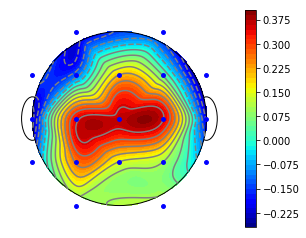

In [44]:
from __future__ import print_function
from __future__ import division
from __future__ import absolute_import

import scipy.interpolate
import numpy
import matplotlib 
import matplotlib.pyplot as plt

# close old plots
plt.close("all")

# some parameters
N = 300             # number of points for interpolation
xy_center = [2,2]   # center of the plot
radius = 2          # radius

# mostly original code
meanR = [9.95184937,   9.87947708,   9.87628496,   9.78414422,
         9.79365258,   9.96168969,   9.87537519,   9.74536093,
        10.16686878,  10.04425475,  10.10444126,  10.2917172 ,
        10.16745917,  10.0235203 ,   9.89914   ,  10.11263505,
         9.99756449,  10.17861254,  10.04704248]
print(len(meanR))
meanR = chan4[1:]
print(len(meanR))
koord = [[1,4],[3,4],[1,3],[3,3],[2,3],[1,2],[3,2],[2,2],[1,1],[3,1],[2,1],[1,0],[3,0],[0,3],[4,3],[0,2],[4,2],[0,1],[4,1]]
print(len(koord))
x,y = [],[]
for i in koord:
    x.append(i[0])
    y.append(i[1])

z = meanR

xi = numpy.linspace(-2, 6, N)
yi = numpy.linspace(-2, 6, N)
zi = scipy.interpolate.griddata((x, y), z, (xi[None,:], yi[:,None]), method='cubic')

# set points > radius to not-a-number. They will not be plotted.
# the dr/2 makes the edges a bit smoother
dr = xi[1] - xi[0]
for i in range(N):
    for j in range(N):
        r = numpy.sqrt((xi[i] - xy_center[0])**2 + (yi[j] - xy_center[1])**2)
        if (r - dr/2) > radius:
            zi[j,i] = "nan"

# make figure
fig = plt.figure()

# set aspect = 1 to make it a circle
ax = fig.add_subplot(111, aspect = 1)

# use different number of levels for the fill and the lines
CS = ax.contourf(xi, yi, zi, 60, cmap = plt.cm.jet, zorder = 1)
ax.contour(xi, yi, zi, 15, colors = "grey", zorder = 2)

# make a color bar
cbar = fig.colorbar(CS, ax=ax)

# add the data points
# I guess there are no data points outside the head...
ax.scatter(x, y, marker = 'o', c = 'b', s = 15, zorder = 3)

# draw a circle
# change the linewidth to hide the 
circle = matplotlib.patches.Circle(xy = xy_center, radius = radius, edgecolor = "k", facecolor = "none")
ax.add_patch(circle)

# make the axis invisible 
for loc, spine in ax.spines.items():
    # use ax.spines.items() in Python 3
    spine.set_linewidth(0)

# remove the ticks
ax.set_xticks([])
ax.set_yticks([])

# Add some body parts. Hide unwanted parts by setting the zorder low
# add two ears
circle = matplotlib.patches.Ellipse(xy = [0,2], width = 0.5, height = 1.0, angle = 0, edgecolor = "k", facecolor = "w", zorder = 0)
ax.add_patch(circle)
circle = matplotlib.patches.Ellipse(xy = [4,2], width = 0.5, height = 1.0, angle = 0, edgecolor = "k", facecolor = "w", zorder = 0)
ax.add_patch(circle)
# add a nose
xy = [[1.5,3], [2,4.5],[2.5,3]]
polygon = matplotlib.patches.Polygon(xy = xy, facecolor = "w", zorder = 0)
ax.add_patch(polygon) 

# set axes limits
ax.set_xlim(-0.5, 4.5)
ax.set_ylim(-0.5, 4.5)

plt.show() 